In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

balance-scale is dataset that classifies the scale to be tipped to left,right or being balanced depending on the parameters 

The target attribute here is class . The data needs to be classified as either balanced(B) , tipped to left(l) , tipped to right(R).


In [158]:
df = pd.read_csv('balance-scale.csv')
print(df.head())
print('\n\nThe infprmation about the data is :- ')
print(df.info())

  Class  L-Weight  L-Distance  R-Weight  R-Distance
0     B         1           1         1           1
1     R         1           1         1           2
2     R         1           1         1           3
3     R         1           1         1           4
4     R         1           1         1           5


The infprmation about the data is :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB
None


Let us find the dimension of the dataframe and print the column names

In [159]:
print(f'The dimension of the datset is :- {df.shape}')
print(f'The columns Names of the datset are :- {df.columns.values}')

The dimension of the datset is :- (625, 5)
The columns Names of the datset are :- ['Class' 'L-Weight' 'L-Distance' 'R-Weight' 'R-Distance']


we can see that for this particular dataset , the predictor features are 'left-weight' 'left-distance' 'right-weight' 'right-distance' as they all influence the classification of data.

.value_counts() :- Return a Series containing counts of unique values.


In [160]:
print(df['Class'].value_counts())

R    288
L    288
B     49
Name: Class, dtype: int64


**From here , we can see that the dataset is imbalanced.**

In [161]:
#Let's create numpy arrays for features and target
X = df.drop('Class', axis=1).values
y = df['Class'].values

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of size of about 40% of the dataset.


In [162]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Text(0, 0.5, 'Error Rate')

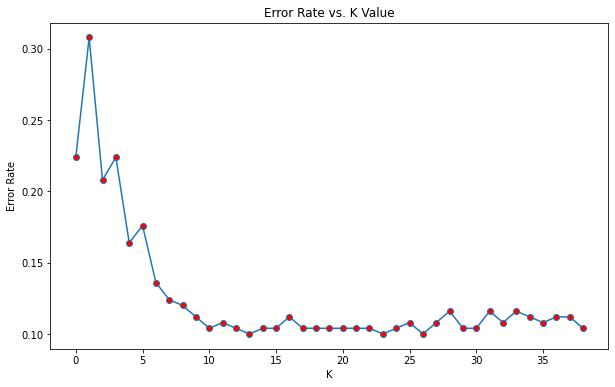

In [163]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#elbow-method
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6)) 
plt.plot(error_rate , marker='o', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

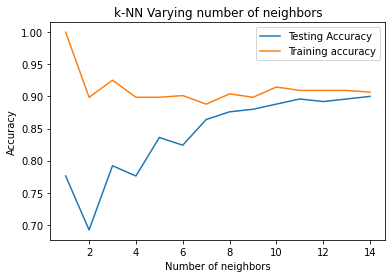

In [164]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))      #Return a new array of given shape and type, without initializing entries.
test_accuracy = np.empty(len(neighbors))


# The enumerate function in Python converts a data collection object into an enumerate object. Enumerate returns an object that contains a counter as a key for each value within an object, making items within the collection easier to access.
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=11. So lets create a KNeighborsClassifier with number of neighbors as 11.

In [188]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print(f'The accuracy of the model is :- {knn.score(X_test,y_test)}')

#Data-point that we will classify using knn
new_data = [1,2,5,3]
predicted1= knn.predict([new_data]) 
print ("Predicted Value:", predicted1)
if predicted1=="B":
  print("Balanced Scale") 
if predicted1=="L":
  print("Scale tipped to left")
if predicted1=="R":
  print("Scale tipped to right")

The accuracy of the model is :- 0.896
Predicted Value: ['R']
Scale tipped to right


In [167]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  1,   8,  11],
       [  0, 113,   2],
       [  2,   3, 110]])

In [168]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.33      0.05      0.09        20
           L       0.91      0.98      0.95       115
           R       0.89      0.96      0.92       115

    accuracy                           0.90       250
   macro avg       0.71      0.66      0.65       250
weighted avg       0.86      0.90      0.87       250



Inference:-KNN calculates distance between test data and train data and predicts the result by considering the answers of k nearest neighbours. KNN doesn't make any assumptions hence is more accurate for smaller datasets. For larger datasets the speed and efficiency decreases
